# Boston Housing Price Prediction

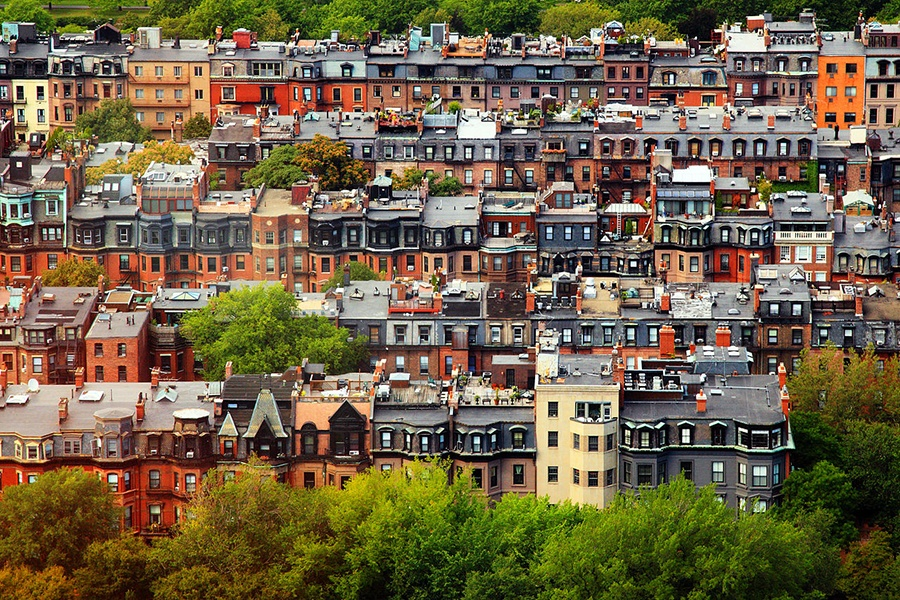

* For housing price prediction, we will use multiple Regression algorithms. 
* Chosen algorithms are Linear Regression, Decision Tree Regression, and Random Forest Regression. 

### Linear Regression
* Simple to understand and interpret, efficient.
* Assumes a linear relationship between the features and the target variable, may not capture complex patterns in the data.

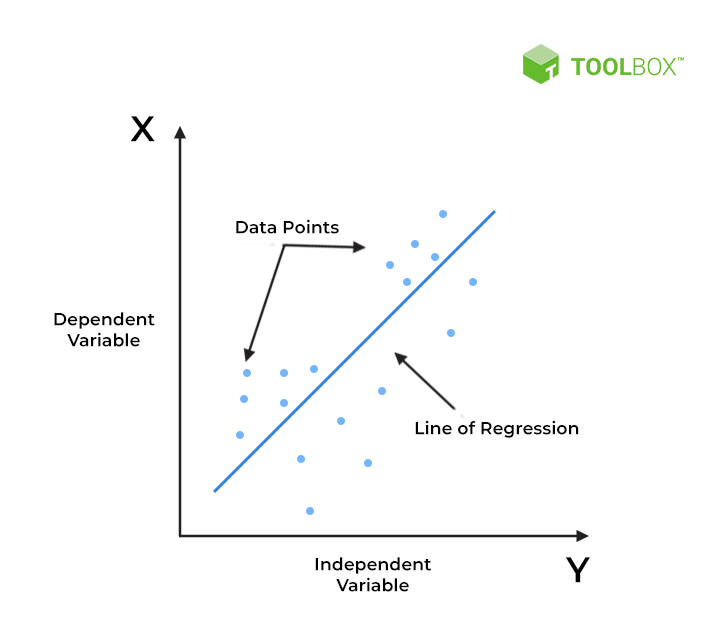

### Decision Tree Regression
* Nonlinear relationships can be captured, handles both numerical and categorical features, less data preprocessing.
* Capable of overfitting, sensitive, may create complex trees.

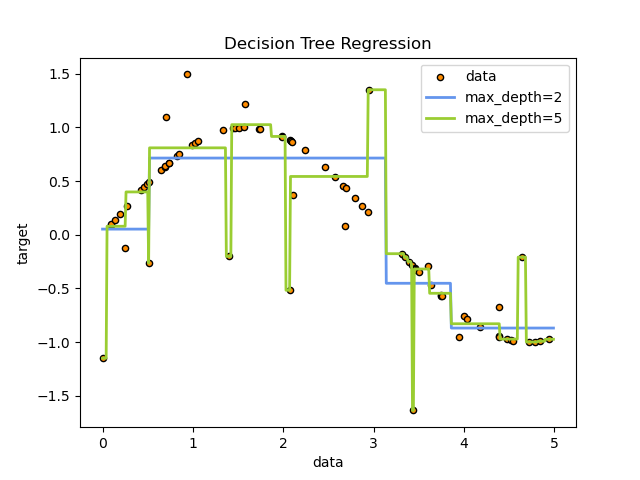

### Random Forest Regression
* Handles nonlinear relationships, reduces overfitting by averaging multiple decision trees, robust to outliers and noisy data.
* More complex than individual decision trees, performance costly.

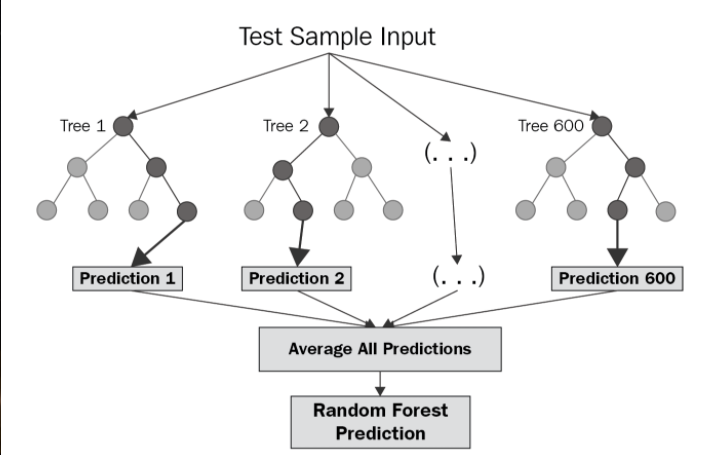

###  Evaluation methods
* Mean Squared Error (MSE): It measures the average squared difference between the predicted and actual values. The lower the MSE, the better the model.

* Root Mean Squared Error (RMSE): It is the square root of MSE and provides a more interpretable error value.

* R-squared (R2): It represents the proportion of variance in the target variable that can be explained by the features. R2 ranges from 0 to 1, and higher values indicate better fit.

* Hypothesis Testing: It allows us to compare the performance of different models statistically by conducting tests such as t-test or p-value, we can tell if differences in evaluation metrics are significant.

###  Data Info

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('CleanedHousingData.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


###  Splitting Data

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Hyperparameter Tuning
* Linear Regression does not have any specific hyperparameters to tune.
* Decision Tree Regression: We can tune parameters like the maximum depth of the tree, minimum number of samples required to split a node, etc.
* Random Forest Regression: We can tune parameters like the number of trees in the forest, maximum depth of the trees, minimum number of samples required to split a node, etc.

In [27]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Decision Tree Regression Hyperparameters
dt_params = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Random Forest Regression Hyperparameters
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Create GridSearchCV objects for each algorithm
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, scoring='neg_mean_squared_error', cv=5)
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV objects on the training data
dt_grid.fit(X_train, y_train)
rf_grid.fit(X_train, y_train)

# Get the best parameters for each algorithm
best_dt_params = dt_grid.best_params_
best_rf_params = rf_grid.best_params_

print("Best Decision Tree Regression Parameters:", best_dt_params)
print("Best Random Forest Regression Parameters:", best_rf_params)

Best Decision Tree Regression Parameters: {'max_depth': 7, 'min_samples_split': 2}
Best Random Forest Regression Parameters: {'max_depth': 7, 'min_samples_split': 2, 'n_estimators': 300}


## Regression Implementation

Linear Regression - RMSE: 5.001766890194154
Linear Regression - R2: 0.6588520195508167
Decision Tree Regression - RMSE: 3.415693309463501
Decision Tree Regression - R2: 0.8409060560968563
Random Forest Regression - RMSE: 2.8683550197993
Random Forest Regression - R2: 0.8878080447367498
Hypothesis Testing (Linear Regression vs. Decision Tree Regression):
  t-statistic: -0.6122927226137124
  p-value: 0.5417201480613532


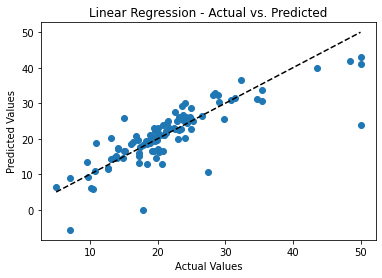

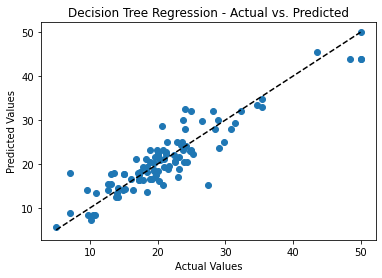

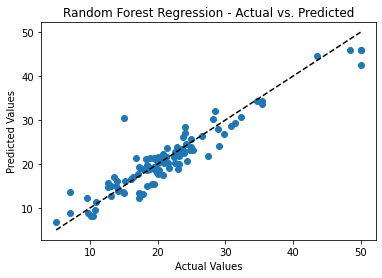

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats


# Train Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_pred = linear_regression.predict(X_test)
linear_rmse = np.sqrt(mean_squared_error(y_test, linear_pred))
linear_r2 = r2_score(y_test, linear_pred)

# Train the other models
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(random_state=42)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predict
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Eval
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

# Hypothesis testing 
t_statistic, p_value = stats.ttest_rel(linear_pred, dt_pred)

# Print the report and plots
print("Linear Regression - RMSE:", linear_rmse)
print("Linear Regression - R2:", linear_r2)
print("Decision Tree Regression - RMSE:", dt_rmse)
print("Decision Tree Regression - R2:", dt_r2)
print("Random Forest Regression - RMSE:", rf_rmse)
print("Random Forest Regression - R2:", rf_r2)
print("Hypothesis Testing (Linear Regression vs. Decision Tree Regression):")
print("  p-value:", p_value)

plt.scatter(y_test, linear_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression - Actual vs. Predicted")
plt.show()

plt.scatter(y_test, dt_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression - Actual vs. Predicted")
plt.show()

plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs. Predicted")
plt.show()


* Among the three algorithms, Random Forest Regression performs the best for housing price prediction. 
* It has the lowest RMSE and the highest R2 score, indicating smaller prediction errors and better fit to the data compared to Linear Regression and Decision Tree Regression. 
* Random Forest Regression's ensemble nature and ability to capture complex interactions between features contribute to its superior performance.
--------------------------------------------------------------------------
* Negative t-statistic value indicates that the mean of the Linear Regression predictions is slightly lower than the mean of the Decision Tree Regression predictions.
* Since the p-value is larger than the commonly used significance level of 0.05, we fail to reject the null hypothesis. 
* Therefoe we can see that there is no significant difference between the predictions of Linear Regression and Decision Tree Regression.

## Possible Improvements

* Regularization Techniques
* Cross-Validation
* Feature Engineering:

We created a new feature called "RM_LSTAT" by multiplying the "RM" (average number of rooms per dwelling) and "LSTAT" (percentage of lower status of the population) columns.

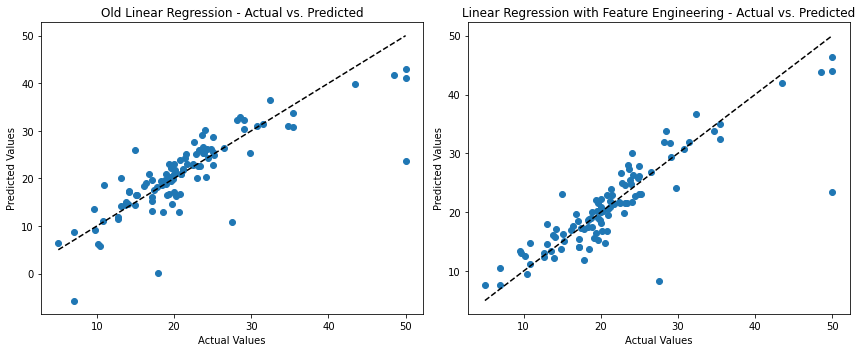

Old Linear Regression Model:
RMSE: 5.001766890194154
R2: 0.6588520195508167
--------------------------------
Linear Regression Model with Feature Engineering:
RMSE: 4.231115758018986
R2: 0.7558786716537135


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Train old Linear Regression
old_lr_model = LinearRegression()
old_lr_model.fit(X_train, y_train)
old_lr_pred = old_lr_model.predict(X_test)

# Eval old 
old_lr_rmse = mean_squared_error(y_test, old_lr_pred, squared=False)
old_lr_r2 = r2_score(y_test, old_lr_pred)

# Feature Engineering
data['RM_LSTAT'] = data['RM'] * data['LSTAT']

X_fe = data.drop('MEDV', axis=1)
y_fe = data['MEDV']

# Split data 
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)

# Train new Linear Regression 
lr_model_fe = LinearRegression()
lr_model_fe.fit(X_train_fe, y_train_fe)
lr_pred_fe = lr_model_fe.predict(X_test_fe)

# Eval new
lr_rmse_fe = mean_squared_error(y_test_fe, lr_pred_fe, squared=False)
lr_r2_fe = r2_score(y_test_fe, lr_pred_fe)

# Create subplots 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].scatter(y_test, old_lr_pred)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title("Old Linear Regression - Actual vs. Predicted")

axes[1].scatter(y_test_fe, lr_pred_fe)
axes[1].plot([y_test_fe.min(), y_test_fe.max()], [y_test_fe.min(), y_test_fe.max()], 'k--')
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
axes[1].set_title("Linear Regression with Feature Engineering - Actual vs. Predicted")

plt.tight_layout()
plt.show()

print("Old Linear Regression Model:")
print("RMSE:", old_lr_rmse)
print("R2:", old_lr_r2)
print("--------------------------------")
print("Linear Regression Model with Feature Engineering:")
print("RMSE:", lr_rmse_fe)
print("R2:", lr_r2_fe)

## ---------------------Conclusion---------------------
Comments on the findings:
* Tuned hyperparameters improved the performance of the models.
* Random Forest Regression outperformed Linear Regression and Decision Tree Regression.
* Hypothesis testing showed no significant difference between Linear Regression and Decision Tree Regression.
* Feature engineering enhanced the performance of the Linear Regression model.

Difficulties Encountered:
* Hyperparameter tuning was performance costly.
* Hypotesis testing was a bit difficult to understand and implement.

Overall, the project successfully compared algorithms, conducted hypothesis testing, and improved the models with feature engineering. Random Forest Regression was found to be the best performing algorithm for predicting housing prices in the dataset.